In [ ]:
"""
categorical distribution

카테고리 분포(Categorical distribution)는 베르누이 분포의 확장판이다. 
베르누이 분포는 0 이나 1(또는 -1 이나 1)이 나오는 확률 변수의 분포였다. 
카케고리 분포는 1부터 K까지의  K개의 정수 값 중 
하나가 나오는 확률 변수의 분포이다. 
따라서 주사위를 던져 나오는 눈금의 수를 확률 변수라고 한다면 
이 확률 변수의 분포는  K=6인 카테고리 분포이다.


카테고리 분포의 모수  θ는 베르누이 분포와 달리 
다음과 같은 제약 조건을 가지는 벡터값이 된다.
p = p1, p2, ...., pk
0 < pi <1
p.sum() = 1
"""

In [ ]:
"""
scipy는 카테고리 분포를 위한 별도의 클래스나 명령어를 제공하지 않는다. 
다만 NumPy의 random 서브패키지의 multinomial 명령에서 
n 인수를 1로 설정하고 pvals에 모수 벡터  θ를 설정하면 1
부터 len(pvals)까지의 카테고리 분포를 따르는 데이터 샘플을 생성할 수 있다.
"""

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
np.random.seed(0)
p = np.array([1/6] * 6)
print(p)
X = np.random.multinomial(n=1, pvals=p, size=20)
X

[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]


array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

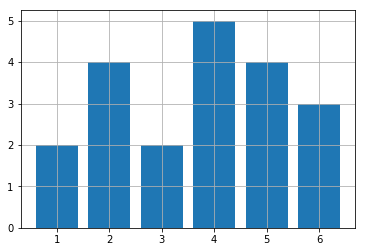

In [9]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.grid()
plt.show()

In [13]:
df = pd.DataFrame({
    "theory": p,
    "simulation": X.mean(axis=0)
})
df = df.stack().reset_index()
df.columns = ["value", "type", "ratio"]
df


,value,type,ratio
0,0,simulation,0.100000
1,0,theory,0.166667
2,1,simulation,0.200000
3,1,theory,0.166667
4,2,simulation,0.100000
5,2,theory,0.166667
6,3,simulation,0.250000
7,3,theory,0.166667
8,4,simulation,0.200000
9,4,theory,0.166667


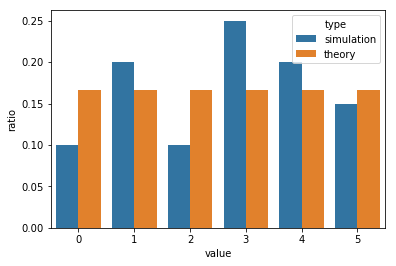

In [14]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

In [33]:
# p를 다른 값으로 실행
np.random.seed(0)
p = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(1, p, size=1000)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ..., 
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0]])

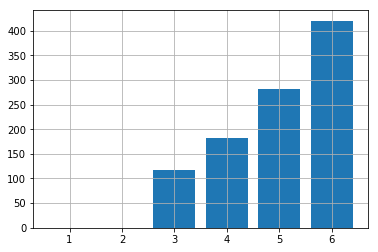

In [35]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.grid()
plt.show()

In [36]:
df = pd.DataFrame(
    {
        "theory": p,
        "simulation" : X.mean(axis=0)
    }
)
df = df.stack().reset_index()
df.columns = ["value", "type", "ratio"]
df

,value,type,ratio
0,0,simulation,0.000
1,0,theory,0.000
2,1,simulation,0.000
3,1,theory,0.000
4,2,simulation,0.117
5,2,theory,0.100
6,3,simulation,0.182
7,3,theory,0.200
8,4,simulation,0.281
9,4,theory,0.300


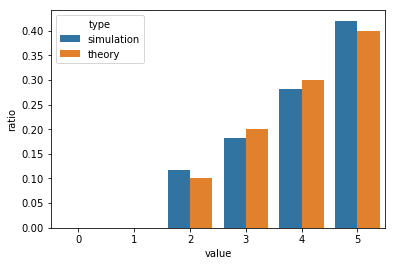

In [37]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()